In [1]:
from tqdm import tqdm
import numpy as np
from sklearn.datasets import load_iris

from seaborn import despine
import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk")

from IPython.display import Image

from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Example 1: The iris dataset

In this notebook, we will be using the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris). 

The dataset contains three classes of 50 instances each; Each class refers to a type of iris plant (setosa, versircolor, and virginica). For each instance, the with and length of the petal and sepal is given (see below).

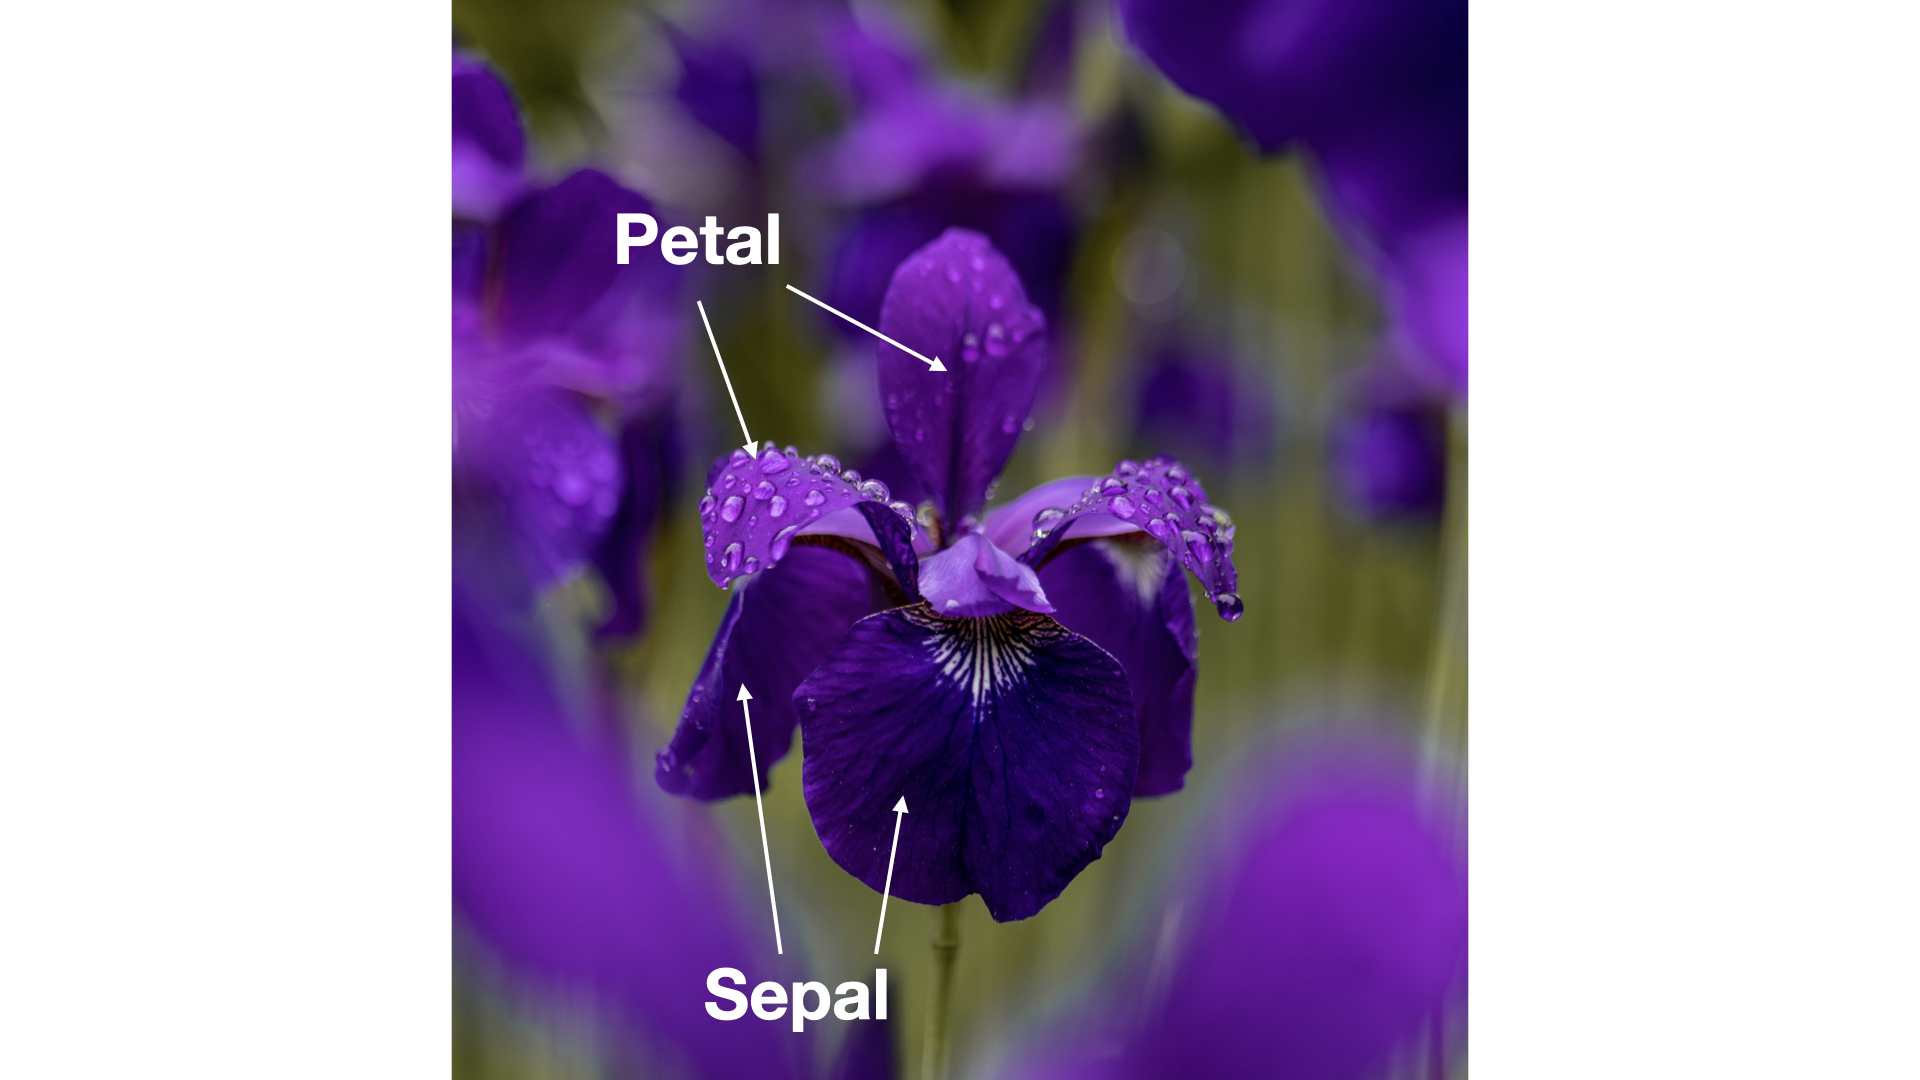

In [2]:
Image(filename='materials/images/free-use/Iris_data.png')

*Image adapted from: https://www.pexels.com/search/iris%20flower/*

First, we will load the data from the [scikit-learn](https://scikit-learn.org/stable/) library:

In [3]:
data = load_iris()

`data`is a dictionary with the following elements: 

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

The iris type is encoded in the `target` entry:

In [5]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The corresponding name of the iris types can be found in `target_names`:

In [6]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

The length and width of the sepal and petal of each instance is given in the `data` entry:

In [7]:
data['data'][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

We can see that data contains 4 features (one per column) for each of 150 instances (one per row):

In [8]:
data['data'].shape

(150, 4)

The corresponding name for each feature-column is given in `feature_names`:

In [9]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Ok, let's take a closer look at the data, by plotting the data according to the sepal width and length (left) as well as the petal width and length (right):

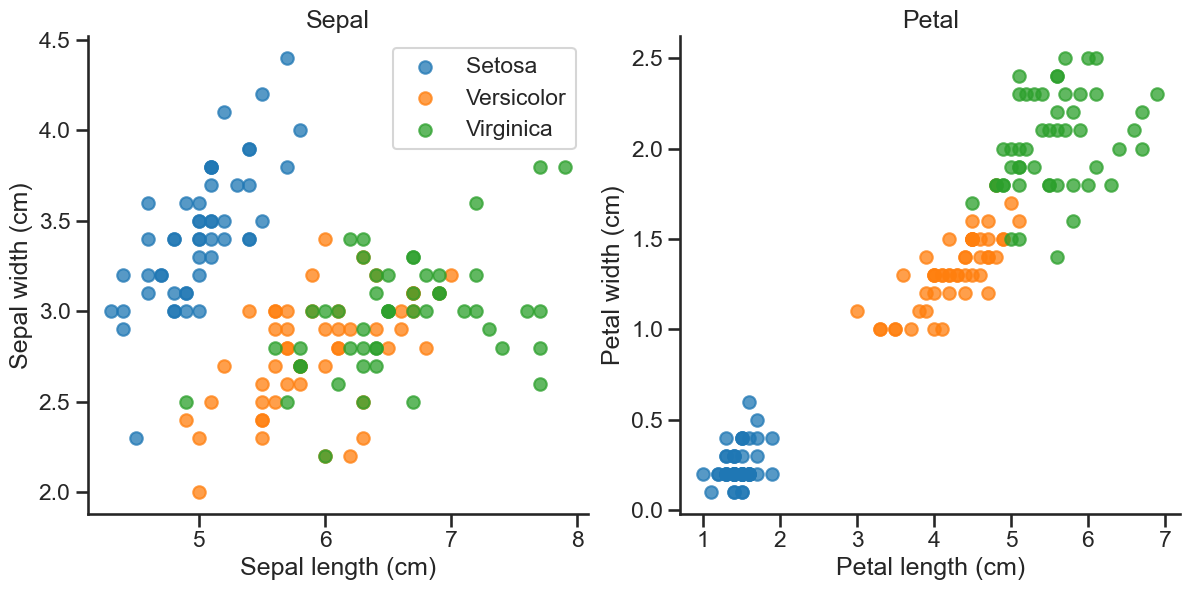

In [10]:
fig, axs = plt.subplots(1,2,figsize=(12,6), dpi=100)
for i, iris_type in enumerate(data['target_names']):
    idx = data['target']==i
    # sepal length / width
    axs[0].scatter(data['data'][idx,0], data['data'][idx,1],
                   color='C{}'.format(i),
                   alpha=0.75,
                   label=iris_type.capitalize())
    # petal length / width
    axs[1].scatter(data['data'][idx,2], data['data'][idx,3],
                   color='C{}'.format(i),
                   alpha=0.75,
                   label=iris_type.capitalize())
# add labels
axs[0].set_title('Sepal')  
axs[0].set_xlabel(data['feature_names'][0].capitalize())    
axs[0].set_ylabel(data['feature_names'][1].capitalize()) 
axs[1].set_title('Petal')  
axs[1].set_xlabel(data['feature_names'][2].capitalize())    
axs[1].set_ylabel(data['feature_names'][3].capitalize()) 
axs[0].legend(loc='upper right')
for ax in axs:
    despine(ax=ax)
fig.tight_layout()
fig.savefig('figures/Figure-0-1_Iris-Data.png', dpi=600)

# 2. Distinguishing setosa and versicolor by petal length and witdh

For simplicity, we will for now only focus on setosa and versicolor irises and try to distinguish them by their petal width and length.

To do this, we will first subset our data to the classes 0 and 1 (setosa and versicolor) as well as the feature-columns 2 and 3 (petal length and width):

In [11]:
idx = np.isin(data['target'], (0, 1))
X = data['data'][idx,2:4]
y = data['target'][idx]
feature_names = data['feature_names'][2:4]

Our subsetted data now contains 100 entries (50 for each of the two iris types) and 2 features per instance:

In [12]:
X.shape

(100, 2)

Looking at the data, distinguishing the two iris types should be easy (we could simply draw a straight line):

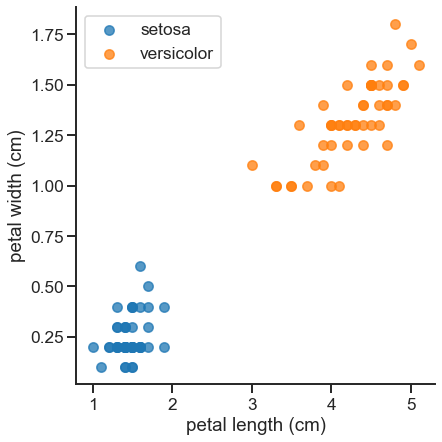

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), dpi=75)
for cl in np.unique(y):
    ax.scatter(x=X[y==cl,0],
               y=X[y==cl,1],
               color='C{}'.format(cl),
               label=data['target_names'][cl],
               alpha=0.75)
# add labels
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.legend()
despine(ax=ax)
# save figure
fig.tight_layout()
fig.savefig('figures/Figure-0-2_Setosa-Versicolor-Petal.png', dpi=600)

# 3. The perceptron

Here, we will be using this simple classification task to introduce the [perceptron algorithm](https://en.wikipedia.org/wiki/Perceptron).

## 3.1 Inspired by biological neurons:

The perceptron algorithm is conceptually inspired by biological neurons.

A biological neuron receives signals or variable manitude through its dendrites. These input signals are then accumulated in the cell body of the neuron. If the accumulated signal exceeds a certain threshold, the neuron outputs a signal through is axon:

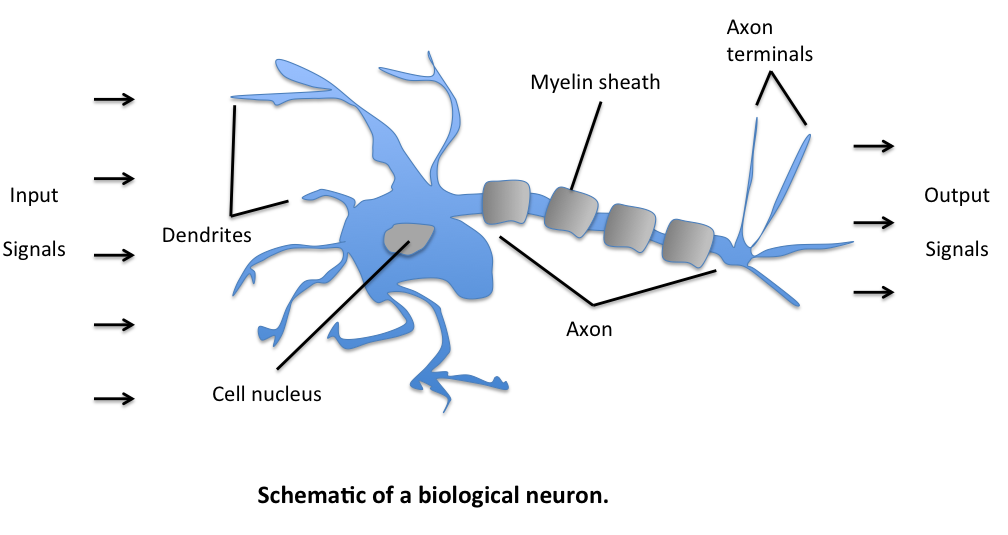

In [14]:
Image(filename='materials/images/free-use/perceptron_neuron.png')

*source: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html*

## 3.2 How it is implemented

The perceptron implements these basic biological processing steps as follows:

1. It receives an input signal for each feature $x_i$ of a data point (in our example, the length and width of the petal).

2. These input signals are then scaled through a set of weights $w$ (one for each feature $x_i$ of the input) and summed (mimicing the "cell body" of the neuron; note that we also add a constant $b$ to the sum (*the bias*).

3. Lastly, the weighted sum is transformed through an activation function $\phi$, representing the output of the perceptron

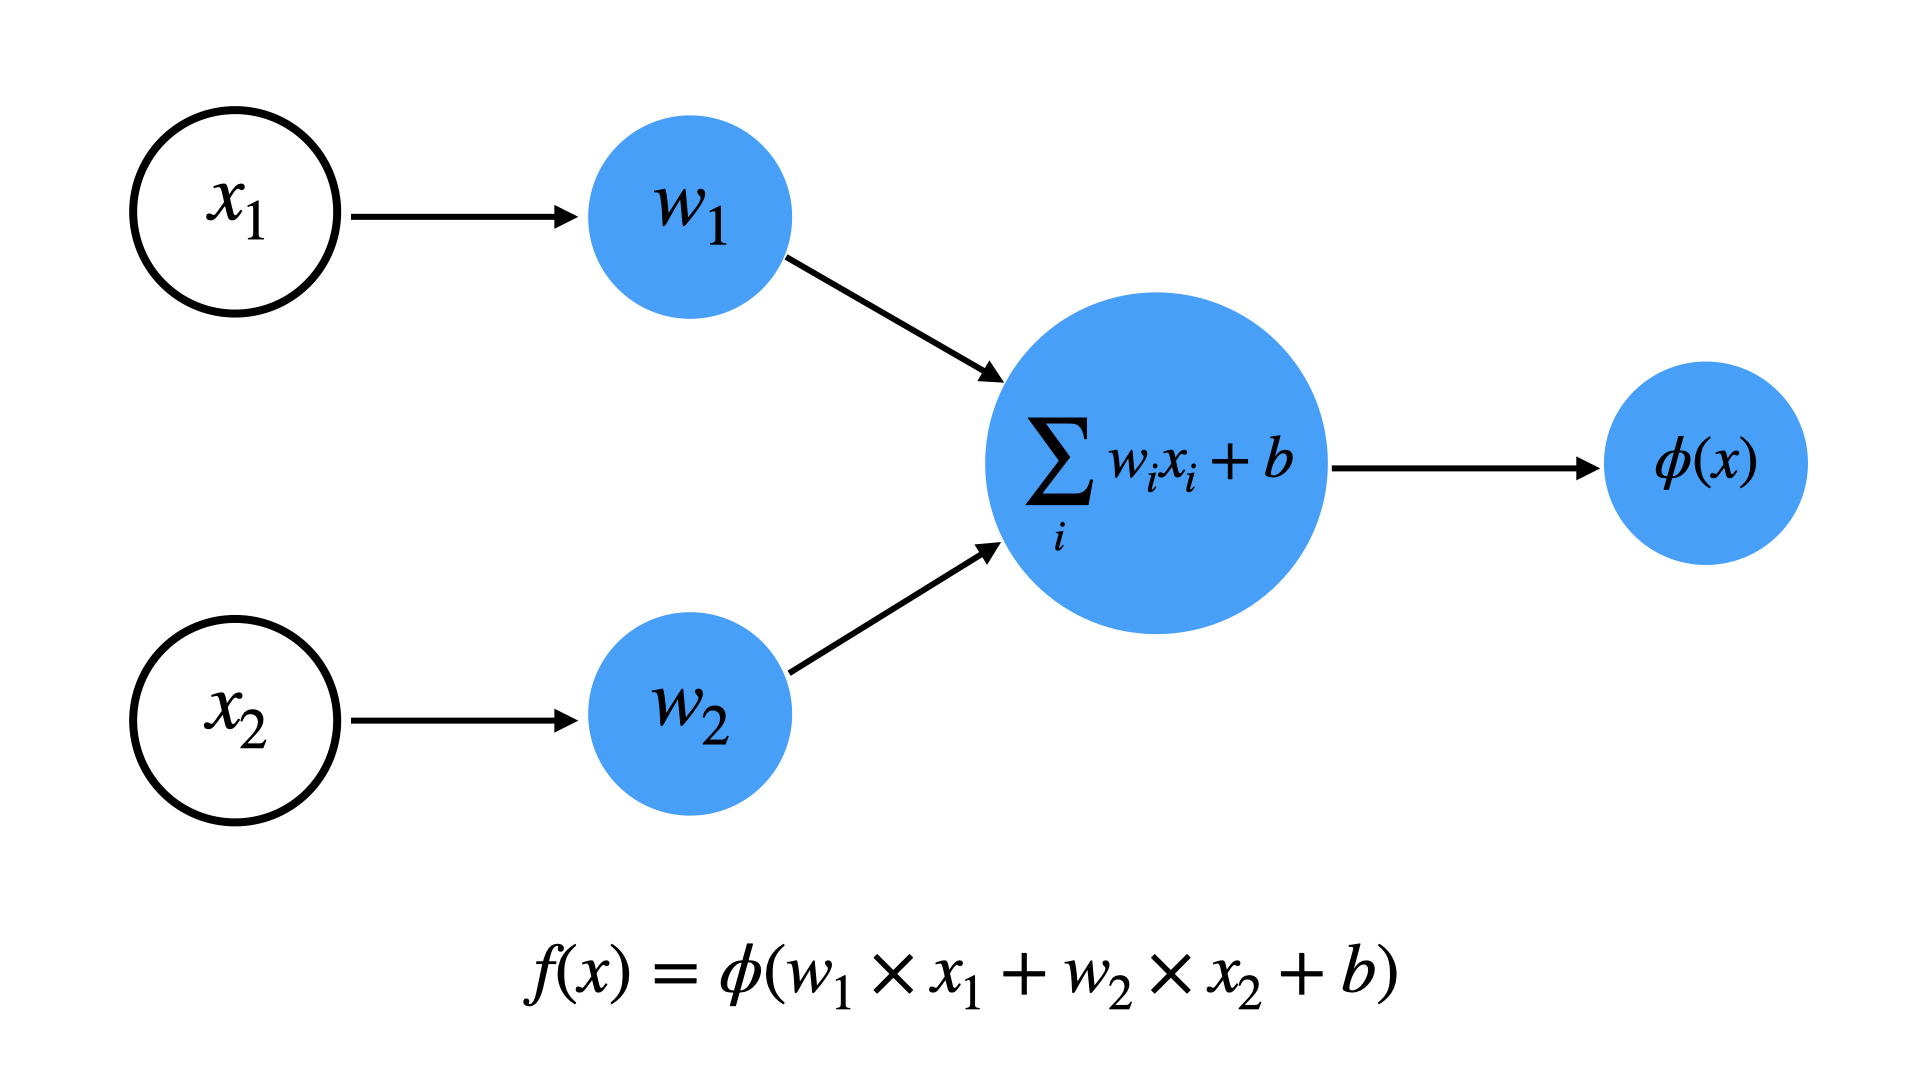

In [15]:
Image(filename='materials/images/free-use/perceptron.png')

### The activation function $\phi$:

The classical percpetron algorithm uses a step activation function, which outputs a value of 1 if the weighted sum is bigger than 0 and -1 otherwise.

Here, we will be using a sigmoid activation function instead. The sigmoid scales the weighted sum to a value between 0 and 1, indicating the probability that the instance belongs to class 1 of our data (here, versicolor irises).

In [16]:
def step(x):
    xout = np.ones_like(x)
    xout[x<0] = -1
    return xout

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x)) 

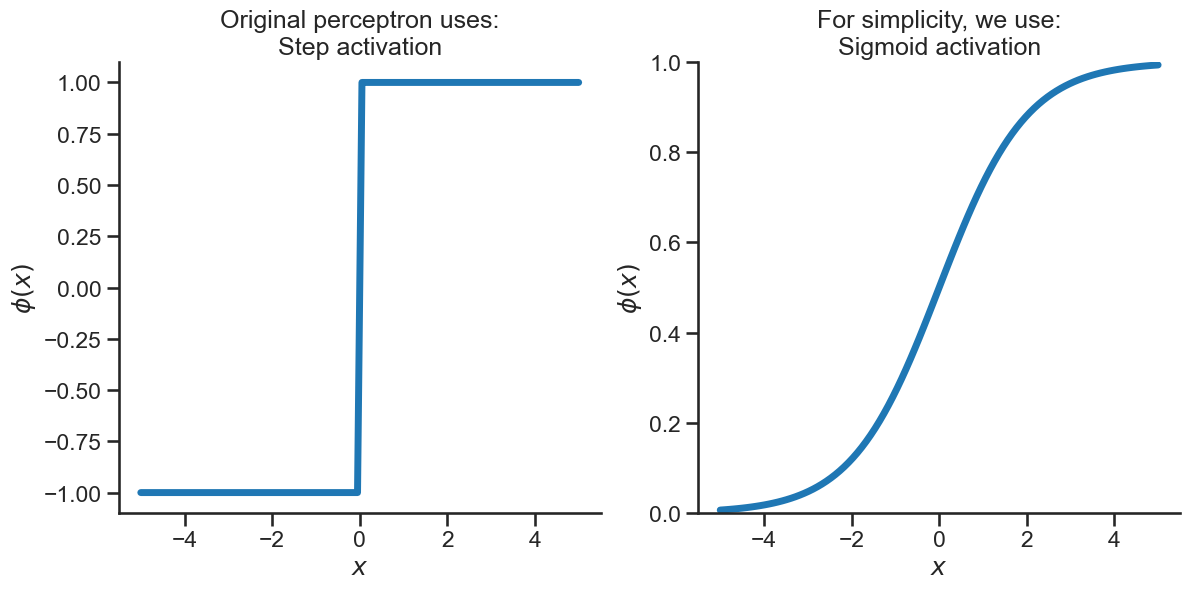

In [17]:
fig, axs = plt.subplots(1,2,figsize=(12,6), dpi=100)
x = np.linspace(-5,5,100)

# Step activation
axs[0].set_title('Original perceptron uses:\nStep activation')
axs[0].plot(x, step(x), lw=5)
axs[0].set_ylabel(r'$\phi(x)$')
axs[0].set_xlabel(r'$x$')

# Sigmoid activation
axs[1].set_title('For simplicity, we use:\nSigmoid activation')
axs[1].plot(x, sigmoid(x), lw=5)
axs[1].set_ylabel(r'$\phi(x)$')
axs[1].set_xlabel(r'$x$')
axs[1].set_ylim(0, 1)

for ax in axs:
    despine(ax=ax)
fig.tight_layout()
fig.savefig('figures/Figure-0-3_Perceptron-Activation.png', dpi=600)

# 4. The loss function

### How can we find the parameters $w$ that best distinguish between setosa and versicolor irises?

So far, we have settled on an architecture of our classifcation algorithm.

Now, how do we determine the set of weights $w$ that allow us to best distinguish between the two iris types?

To do this, we need to define a loss function. For our perceptron algorithm, we can use the [cross-entropy loss](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html):

$L = -(y \times log(p) + (1-y) \times log(1-p))$ 

As we can see, this loss function consists of two elements: one that applies, if y = 1 and one that applies, if y=0.

Let's look at these two parts of the loss in more detail: 

/opt/miniconda3/envs/dlworkshop/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/opt/miniconda3/envs/dlworkshop/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


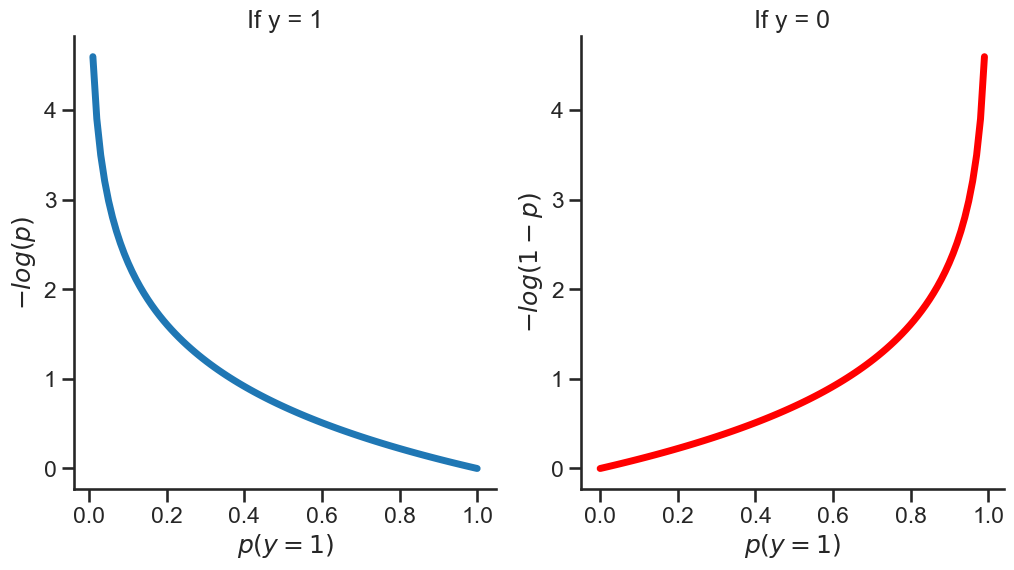

In [18]:
fig, axs = plt.subplots(1,2,figsize=(12,6),dpi=100)

p = np.linspace(0,1,100)

# if y = 1
axs[0].plot(p, -np.log(p), lw=5)
axs[0].set_title('If y = 1')
axs[0].set_ylabel(r'$-log(p)$')
axs[0].set_xlabel(r'$p(y=1)$')
(despine(ax=axs[0]))

# if y = 0
axs[1].plot(p, -np.log(1-p), lw=5, color='red')
axs[1].set_title('If y = 0')
axs[1].set_ylabel(r'$-log(1-p)$')
axs[1].set_xlabel(r'$p(y=1)$')
(despine(ax=axs[1]))

fig.savefig('figures/Figure-0-4_Cross-Entropy-Loss.png', dpi=600)

We can see that the first part of the loss ($-log(p)$) is minimal, when the prediction $p$ (or $\phi(x)$) of our model is close to $1$. Similarly, the second part of the loss ($-log(1-p)$) is minial, when the perdiction $p$ of our model is close to $0$.

So our goal will be to find the set of weights $w$ that minimizes the cross entropy loss, given our binary iris dataset.

Let's take a look at how the loss function changes as a function of the two weights of our perceptron:

In [19]:
class cross_entropy_loss:
    def __init__(self):
        name = 'cross entropy'
        
    def loss(self, y, y_pred, zerotol=1e-10):
        """the cross-entropy loss:
        
        Args:
            y (array): labels for each insatance (0 or 1)
            y_pred (array): predicted probabilty that
                each instance belongs to class 1
        """
        loss = -(y * np.log(y_pred + zerotol) + (1 - y) * np.log(1 - y_pred + zerotol))
        return loss
    
    def derivative_loss(self, y, y_pred):
        """the derivative of the cross-entropy loss w.r.t. 
        to sigmoid activation function
        (we will get to this later)
        
        Args:
            y (array): labels for each insatance (0 or 1)
            y_pred (array): predicted probabilty that
                each instance belongs to class 1
        """
        return y_pred - y

In [20]:
xeLoss = cross_entropy_loss()

b = -19 # lets set the bias to -19 (trust me, this is a good value here ^^)
w1_vals = np.linspace(-10, 30, 100)
w2_vals = np.linspace(-10, 30, 100)

W1, W2 = np.meshgrid(w1_vals, w2_vals)
grid_r, grid_c = W1.shape
ZZ = np.zeros((grid_r, grid_c))
for i in range(grid_r):
    for j in range(grid_c):
        w = np.array([W1[i,j], W2[i,j]])
        y_pred = sigmoid(X.dot(w)+b)
        ZZ[i, j] += np.mean(xeLoss.loss(y, y_pred))

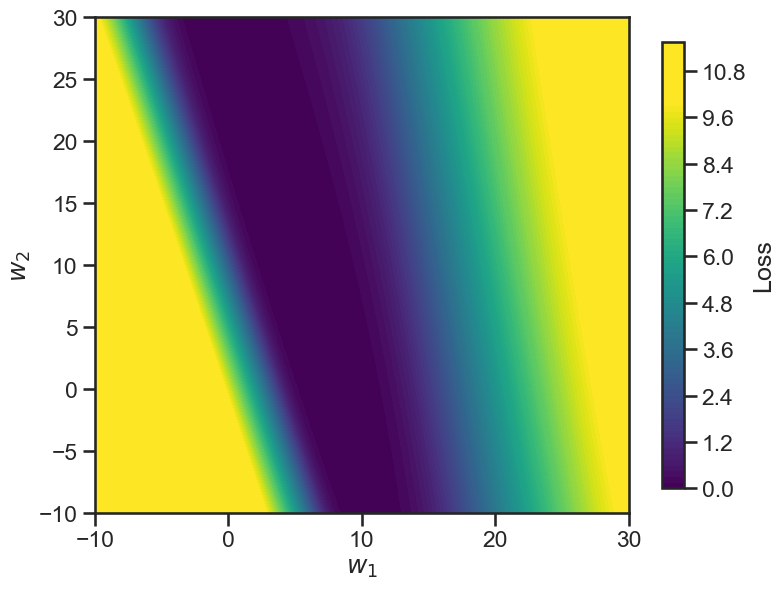

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi=100)
# plot contour
cs = ax.contourf(W1, W2, ZZ, 100, vmax=10, cmap=cm.viridis)
cbar = fig.colorbar(cs, ax=ax, shrink=0.9)
# label axes
cbar.set_label('Loss')
ax.set_xlabel(r"$w_1$")
ax.set_ylabel(r"$w_2$")
# save figure
fig.tight_layout()
fig.savefig('figures/Figure-0-2_Perceptron-Loss.png', dpi=600)

To get a better feeling for the slope of the loss, let's also look at this in 3D:

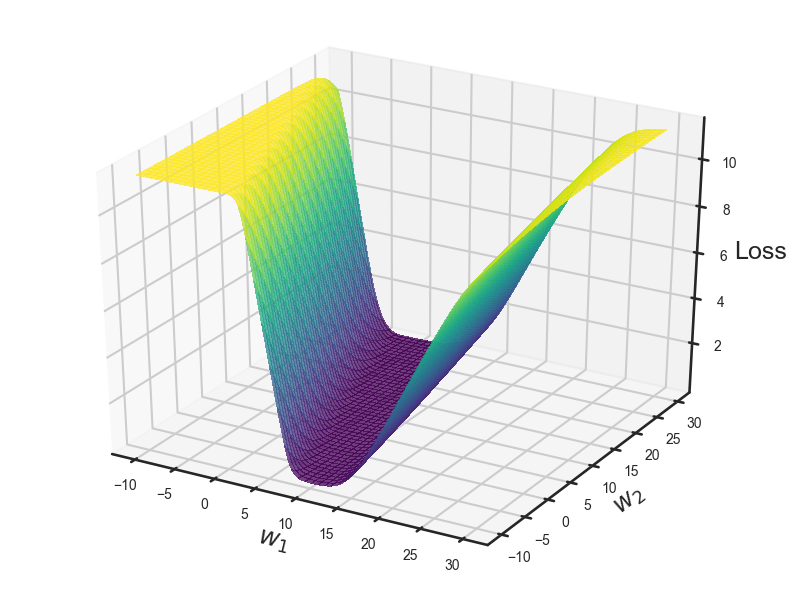

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize=(8,6), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, ZZ, alpha=0.75, cmap=cm.viridis, 
                linewidth=0, antialiased=False, zorder=-99)
ax.set_xlabel(r"$w_1$")
ax.set_ylabel(r"$w_2$")
ax.set_zlabel('Loss', labelpad=7)
ax.tick_params(labelsize=10)
fig.tight_layout()
fig.savefig('figures/Figure-0-3_Perceptron-Loss-3D.png', dpi=600)

Ok! This is a pretty steep descent with a very clear valley; Finding a minimum should be easy!

# 5. (Stochastic) gradinet descent

[Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) is one of the most central techniques of modern machine learning. It's goal is to find a (local) minimum of a loss function, given an input dataset.

We have already seen that our loss function changes with the values of our two perceptron weights $w$.

To find the weights that minimze the loss function, gradient descent procedes as follows: 

1. First, we initialize the weights randomly (here, between -1 and 1).


2. Subsequently, we compute the derivative of the loss function with respect to our weights $\frac{dL}{dw}$. The derivative indicates the slope of the loss function for a given $w$ (describing how much the loss function changes at this point w.r.t. a change in $w$): 
    - A negative derivative indicates that the loss decreases with an increase in $w$
    - A positive derivative indicates that the loss increases with an increasing $w$. 


3. To move closer to the minimum of the loss, we simply subtract the derivative from our current weights $w$. Note that we scale the derivative by $\alpha$ (the learning rate), allowing us to determine the size of the step that we take at each iteration.


4. We iteratively repeat steps 2 and 3 until we have reached a minimum of the loss function and our gradient descent algorithm has converged (due to the very small derivatives close to the minimum of the loss, the weights should not change much anymore close to the minimum). 


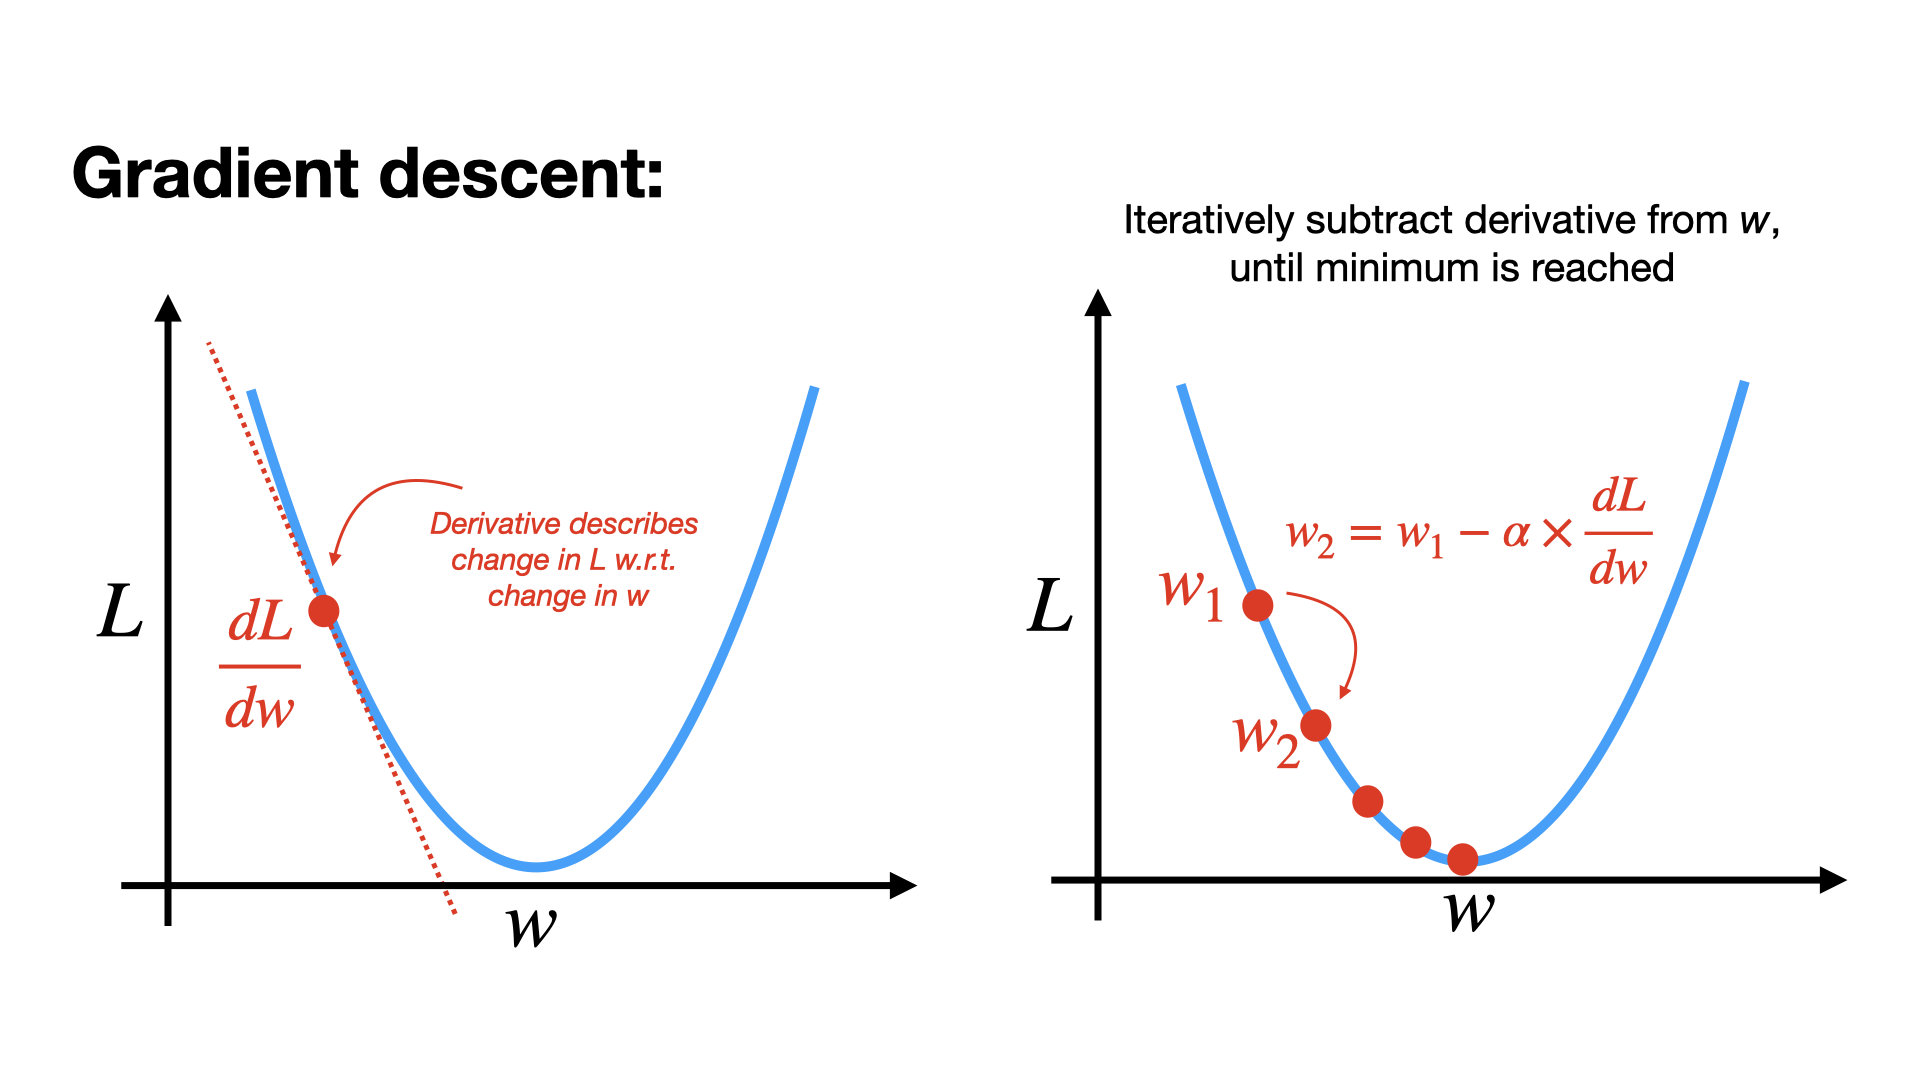

In [23]:
Image(filename='materials/images/free-use/Gradient-Descent.png')

# 6. Our perceptron implementation

Let's put all of this together into an implementation of a perceptron:

In [24]:
class Perceptron:
    
    def __init__(self, n_in, activation=sigmoid, loss=cross_entropy_loss, b=None):
        """A simple perceptron implementation.
        
        Args:
            n_in (int): number of input features for each instance
            activation (function): activation function of the perceptron
            loss (function): loss function that we use; 
                this should be cross_entropy for sigmoid activations
            b (float): bias term; if a value is specified, the
                bias term is set to this value. if not, 
                the bias will be estimated during training.
        """
        self.n_in = n_in
        self.w = np.random.uniform(-1,1,n_in)
        if b is None:
            self.b = np.random.uniform(-1,1,1)
            self.fit_b = True
        else:
            self.b = b
            self.fit_b = False
        self.activation = activation
        self.loss = loss().loss
        self.derivative_loss = loss().derivative_loss

    def predict(self, x):
        """Predict probability that each 
        instance of x (n_instances x n_features)
        belongs to class 1
        
        Args:
            x (ndarray): input data (n_instances x n_features)
        """
        self.Z = np.dot(x, self.w) + self.b
        self.A = self.activation(self.Z)
        return self.A
    
    def update_weights(self, x, y, learning_rate):
        """A single gradient descent step.
        
        Args:
            x (ndarray): input data (n_instances x n_features)
            y (array): label of each instance (0 or 1)
            learning_rate (float): learning rate of gradient
                descent algorithm
        """
        # compute derivative of loss wrt Z
        dZ = self.derivative_loss(y, self.predict(x))
        dW = np.dot(dZ, x)
        # subtract average derivative from weights
        self.w -= learning_rate * 1.0/dW.shape[0] * dW
        if self.fit_b:
            self.b -= learning_rate * (1.0/x.shape[0] * np.sum(dZ))
            
    def train(self, x, y, batch_size=8, learning_rate=1, n_steps=100):
        """Iteratively train the perceptron.
        At each iteration, the algorithm will draw 
        a random sample from x and perform a weight 
        updated for the derivatives resulting from
        this sample.
        
        Args:
            x (ndarray): input data (n_instances x n_features)
            y (array): label of each instance (0 or 1)
            learning_rate (float): learning rate of gradient
                descent algorithm
            n_steps (int): number of iterations to perform
                during training
        """
        self.training_w = np.zeros((n_steps, self.n_in+1))
        self.training_loss = np.zeros(n_steps)
        for s in tqdm(range(n_steps)):
            # draw a random batch
            batch_idx = np.random.choice(x.shape[0], batch_size, replace=False)
            # compute and store mean loss
            self.training_loss[s] = np.mean(self.loss(y[batch_idx], self.predict(X[batch_idx])))
            # store current weights
            self.training_w[s,:self.n_in] = self.w
            self.training_w[s,-1] = self.b
            # update weights
            self.update_weights(X[batch_idx], y[batch_idx], learning_rate)

And let's see if our implementation works and finds a decision boudary that allows us to accurately distinguish between setosa and versicolor irises, given their petal length and width.

To give better insight into the process, we will perform gradient descent manually, by the use of the `predict`, `loss`, and `update_weights` functions of our `perceptron`. This process is also wrapped in the `train` function of our perceptron implementation.

Note that we do not use the full dataset to update our weights at each iteration, but instead draw a random sample at each iteration (which we use to compute an estimate of the gradient). This procedure is called [*stochastic* gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) and is common in the literature for large datasets (for which it would be too costly to compute the gradient over the entire dataset at each iteration).

In [25]:
np.random.seed(4123)

perceptron = Perceptron(n_in=2, b=-19) # n_in defines the number of input features that our perceptron expects 
# we set our bias value to -19 as previously discussed

n_steps = 35001 # the number of gradient descent iterations (or steps) that we will perform
batch_size = 32 # the number of random samples that we draw at each iteration to perform our gradient descent step

# we will use these to store the loss and weights at each step
training_loss = np.zeros(n_steps)
training_w = np.zeros((n_steps+1,2))
for s in tqdm(range(n_steps)):
    # lets draw a random batch
    batch_idx = np.random.choice(X.shape[0], batch_size, replace=False)
    # lets compute the loss for our random sample and store it
    training_loss[s] = np.mean(perceptron.loss(y[batch_idx], perceptron.predict(X[batch_idx])))
    # lets also store the current weights
    training_w[s] = perceptron.w
    # and lastly lets update the weights (for details, see the perceptron implementation above):
    perceptron.update_weights(x=X[batch_idx], y=y[batch_idx], learning_rate=0.5)

100%|██████████| 35001/35001 [00:01<00:00, 17512.62it/s]


Ok, lets take a look at the results:

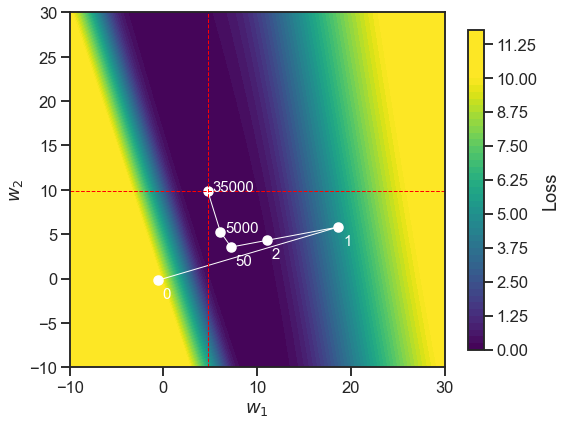

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
# plot contour
cs = ax.contourf(W1, W2, ZZ, 50, vmax=10, cmap=cm.viridis)
cbar = fig.colorbar(cs, ax=ax, shrink=0.9)
# plot trajectory
steps = np.array([0,1,2,50,5000,35000])
ax.scatter(training_w[steps,0], training_w[steps,1], color='white')
ax.plot(training_w[steps,0], training_w[steps,1], color='white', lw=1)
for s in steps:
    if s < 100:
        ax.text(training_w[s,0]+0.5, training_w[s,1]-2, s, color='white', fontsize=15)
    else:
        ax.text(training_w[s,0]+0.5, training_w[s,1], s, color='white', fontsize=15)
ax.axvline(training_w[s,0], color='red', lw=1, ls='--')
ax.axhline(training_w[s,1], color='red', lw=1, ls='--')
# label axes
cbar.set_label('Loss')
ax.set_xlabel(r"$w_1$")
ax.set_ylabel(r"$w_2$")
# save figure
fig.tight_layout()
fig.savefig('figures/Figure-0-4_Perceptron-Loss-Gradinet-Descent-Path.png', dpi=600)

Interesting, it looks like we choose a learning rate that was too large: The first gradient descent step took us all the way across the valley!

Luckily, we then from there traveled safely down to the minimum.

# 7. The learned decision function

Finally, we can test whether our trained perceptron is able to accurately distinguish between setosa and versicolor irises! 

To do this, we will plot the decision boundary that it has learned.

In [27]:
# define the x and y grid
x1grid = np.linspace(0, 6, 50)
x2grid = np.linspace(0, 2, 50)
# create all of the rows and columns of the grid
xx1, xx2 = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx1.flatten(), xx2.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1, x2 input for the model
grid = np.hstack((r1,r2))

In [28]:
# predict with trained perceptron for each grid value 
# (indicating the probability that this point of the grid belongs to class 1)
zz = perceptron.predict(grid).reshape(xx1.shape)

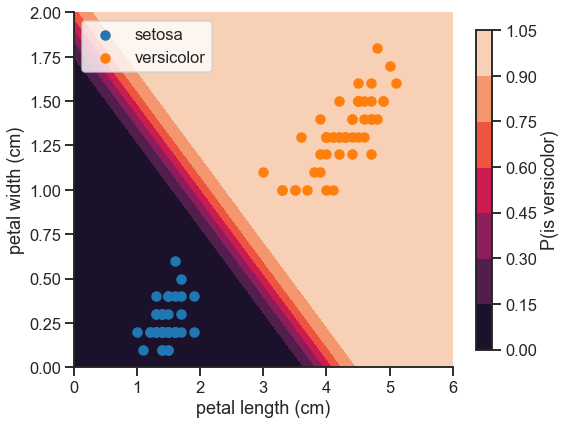

In [29]:
# plot the decision function
fig, ax = plt.subplots(1, 1, figsize=(8,6))
cs = ax.contourf(xx1,xx2,zz)
cbar = fig.colorbar(cs, ax=ax, shrink=0.9)
cbar.set_label('P(is {})'.format(data['target_names'][1]))
for cl in np.unique(y):
    idx = y==cl
    ax.scatter(x=X[idx,0],
               y=X[idx,1],
               color='C{}'.format(cl),
               label=data['target_names'][cl],
               alpha=1)
# add labels
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.legend()
despine(ax=ax)
# save figure
fig.tight_layout()
fig.savefig('figures/Figure-0-5_Perceptron-Decision-Function.png', dpi=600)

Yay! Our perceptron accurately distinguises the two iris types.

Importantly, due to its computatinoal nature, the decision boundary of the perceptron represents a [hyperplane](https://en.wikipedia.org/wiki/Hyperplane) (a subspace whose dimension is one less than that of the input data; for 2-dimensional data, the decision boundary represents a straight line; as we can see).

# 8. Your Exersice

In [30]:
def plot_gradient_descent_path(perceptron):
    
    # extract the weights for each gradient step
    training_w = np.array(perceptron.training_w)
    n_steps = len(training_w)
    steps = np.array([0,1,2,50,n_steps-1])

    # compute the values of the loss function for a grid of w-values, given our learned bias term
    b = float(perceptron.b)
    w1_vals = np.linspace(np.min([np.min(training_w[:,0]), -30]),
                          np.max([np.max(training_w[:,0]), 50]), 100)
    w2_vals = np.linspace(np.min([np.min(training_w[:,1]), -30]),
                          np.max([np.max(training_w[:,1]), 50]), 100)
    W1, W2 = np.meshgrid(w1_vals, w2_vals)
    grid_r, grid_c = W1.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            w = np.array([W1[i,j], W2[i,j]])
            y_pred = perceptron.activation(X.dot(w)+b)
            ZZ[i, j] += np.nan_to_num(np.mean(perceptron.loss(y, y_pred)))


    # plot the loss function and gradient descent steps
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    # plot contour
    cs = ax.contourf(W1, W2, ZZ, 50, vmax=10, cmap=cm.viridis)
    cbar = fig.colorbar(cs, ax=ax, shrink=0.9)
    # plot trajectory
    ax.scatter(training_w[steps,0], training_w[steps,1], color='white')
    # mark start point
    ax.scatter(training_w[0,0], training_w[0,1], color='black', s=200, zorder=99)
    ax.plot(training_w[steps,0], training_w[steps,1], color='white', lw=1)
    # add line for final weights
    ax.axvline(training_w[s,0], color='red', lw=1, ls='--')
    ax.axhline(training_w[s,1], color='red', lw=1, ls='--')
    # label axes
    cbar.set_label('Loss')
    ax.set_title('Final loss: {}'.format(perceptron.training_loss[-1]))
    ax.set_xlabel(r"$w_1$")
    ax.set_ylabel(r"$w_2$")
    
    return fig, ax

To give you a more intuitive understanding of the interplay of the number of iterations, the batch size, and the learning rate of the gradient descent algorithm, play around with them in the code below. 

The code will output a figure of the gradient descent steps and the loss function as well as your final loss value.

**1. What would be a good learning rate and batch size for this problem?**

**2. What is the smalles loss that you can achieve?**

100%|██████████| 35001/35001 [00:02<00:00, 13462.69it/s]


Your final loss is: 0.0019916512232755375


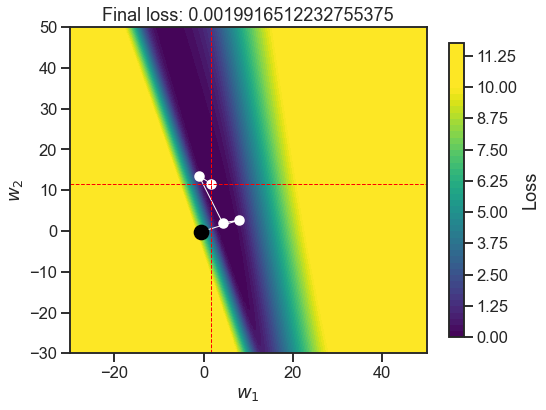

In [31]:
np.random.seed(4123)



# ---------------
# Your values go here:

n_steps = 35000 # number of gradient descent steps
batch_size = 100 # number of random samples drawn at each iteration (needs to be < 101)
learning_rate = 0.1 # try values between 0.001 and 10

# ---------------



# initialize perceptron
perceptron = Perceptron(n_in=2) # this time we do not fixate the bias, but learn it also!
# train perceptron
perceptron.train(x=X, y=y,
                 n_steps=n_steps+1,
                 batch_size=batch_size,
                 learning_rate=learning_rate)
print('Your final loss is: {}'.format(perceptron.training_loss[-1]))


# plot gradient descent path
fig, ax = plot_gradient_descent_path(perceptron)